# Machine Learning - Autoregression Models for Time Series Forecasting

In this notebook, we are going to explore a couple of diffrent machine learning models to predict time-series data.

Here is a link to all articles/tutorials:
 - [Time Series Archive](http://machinelearningmastery.com/category/time-series/)
 
Here are links to specific articles:
 - [How to Make Out-of-Sample Forecasts with ARIMA in Python](http://machinelearningmastery.com/make-sample-forecasts-arima-python/)
 - [Sensitivity Analysis of History Size to Forecast Skill with ARIMA in Python](http://machinelearningmastery.com/sensitivity-analysis-history-size-forecast-skill-arima-python/)
 - [Feature Selection for Time Series Forecasting with Python](http://machinelearningmastery.com/feature-selection-time-series-forecasting-python/)
 - [Simple Time Series Forecasting Models to Test So That You Don’t Fool Yourself](http://machinelearningmastery.com/simple-time-series-forecasting-models/)
 - [Autoregression Models for Time Series Forecasting With Python](http://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)

## Autoregression Models for Time Series Forecasting

In [24]:
import pandas as pd

from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# load dataset
data = pd.read_csv('data/slo_weather_history.csv', index_col=0)

# display first few rows
data.head()

,dew_point_f_avg,dew_point_f_high,dew_point_f_low,events,humidity_%_avg,humidity_%_high,humidity_%_low,precip_in_sum,sea_level_press_in_avg,sea_level_press_in_high,sea_level_press_in_low,temp_f_avg,temp_f_high,temp_f_low,visibility_mi_avg,visibility_mi_high,visibility_mi_low,wind_gust_mph_high,wind_mph_avg,wind_mph_high
date,,,,,,,,,,,,,,,,,,,,
2012-1-1,44.0,50.0,34.0,Fog,80.0,100.0,25.0,0.00,30.15,30.23,30.08,56.0,73.0,39.0,6.0,10.0,0.0,0.0,1.0,8.0
2012-1-2,47.0,52.0,43.0,Fog,93.0,100.0,63.0,0.00,30.23,30.30,30.19,52.0,63.0,42.0,4.0,10.0,0.0,0.0,3.0,14.0
2012-1-3,43.0,50.0,37.0,Fog,85.0,100.0,32.0,0.01,30.24,30.28,30.17,58.0,77.0,39.0,6.0,10.0,0.0,0.0,2.0,10.0
2012-1-4,42.0,47.0,37.0,,69.0,96.0,33.0,0.00,30.24,30.30,30.20,56.0,73.0,39.0,10.0,10.0,8.0,0.0,1.0,9.0
2012-1-5,42.0,51.0,36.0,,66.0,93.0,23.0,0.00,30.15,30.22,30.09,60.0,78.0,42.0,10.0,10.0,7.0,22.0,4.0,18.0


### Quick Check for Autocorrelation

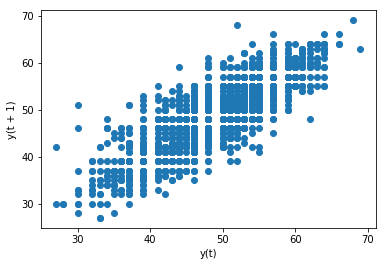

In [26]:
lag_plot(data['temp_f_low'])
plt.show()

In [27]:
df = pd.concat([data['temp_f_low'].shift(1), data['temp_f_low']], axis=1)
df.columns = ['t-1', 't+1']
result = df.corr()

result

,t-1,t+1
t-1,1.000000,0.827876
t+1,0.827876,1.000000


### Autocorrelation Plots

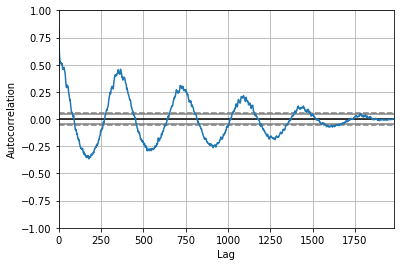

In [28]:
autocorrelation_plot(data['temp_f_low'])
plt.show()

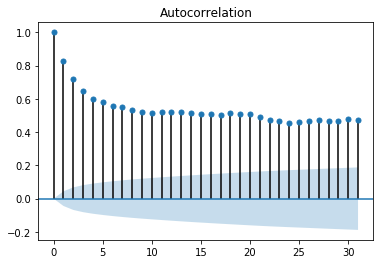

In [29]:
plot_acf(data['temp_f_low'], lags=31)
plt.show()

### Persistence Model

In [30]:
# split into train and test sets
X = df.values

train, test = X[1:len(X) - 7], X[len(X) - 7:]

train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

In [31]:
# persistence model
def model_persistence(x):
    return x

In [34]:
# walk-forward validation
predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 3.546


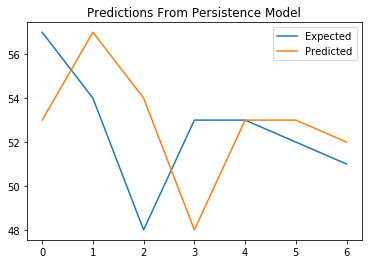

In [36]:
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions)
plt.title('Predictions From Persistence Model')
plt.legend(['Expected', 'Predicted'])
plt.show()

### Autoregression Model
#### Fixed AR Model

In [37]:
# split into train and test sets
X = data['temp_f_low'].values

train, test = X[1:len(X) - 7], X[len(X) - 7:]

In [38]:
# train autoregression
model = AR(train)
model_fit = model.fit()

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 25
Coefficients: [  2.69113832e+00   6.76535679e-01   8.33505352e-03   2.34633082e-02
  -1.92289500e-02   6.49388665e-02  -1.93464232e-02   4.35407817e-02
  -2.07799429e-02   1.42483914e-02  -5.13330412e-03   5.51131468e-02
  -3.91629730e-03   2.46577053e-02  -5.57516104e-03   9.05781894e-03
   3.92788546e-02  -4.76940790e-02   8.01136510e-02  -2.04711469e-02
   3.98518674e-02  -1.25816581e-03  -1.70186794e-02   8.41351825e-03
  -2.88694521e-02   4.81265624e-02]


In [40]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('Day %d -- Forecast: %f, Actual: %f' % (i + 1, predictions[i], test[i]))

error = np.sqrt(mean_squared_error(test, predictions))
print('\nTest RMSE: %.3f' % error)

Day 1 -- Forecast: 52.116721, Actual: 57.000000
Day 2 -- Forecast: 51.344425, Actual: 54.000000
Day 3 -- Forecast: 51.397121, Actual: 48.000000
Day 4 -- Forecast: 51.601338, Actual: 53.000000
Day 5 -- Forecast: 51.568685, Actual: 53.000000
Day 6 -- Forecast: 51.614797, Actual: 52.000000
Day 7 -- Forecast: 51.461988, Actual: 51.000000

Test RMSE: 2.586


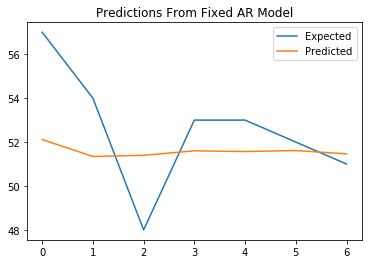

In [41]:
# plot results
plt.plot(test)
plt.plot(predictions)
plt.title('Predictions From Fixed AR Model')
plt.legend(['Expected', 'Predicted'])
plt.show()

#### Rolling AR Model

In [42]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [44]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('Day %d -- Forecast: %f, Actual: %f' % (t + 1, yhat, obs))

error = np.sqrt(mean_squared_error(test, predictions))
print('\nTest RMSE: %.3f' % error)

Day 1 -- Forecast: 52.116721, Actual: 57.000000
Day 2 -- Forecast: 54.648137, Actual: 54.000000
Day 3 -- Forecast: 53.234415, Actual: 48.000000
Day 4 -- Forecast: 49.439777, Actual: 53.000000
Day 5 -- Forecast: 52.455022, Actual: 53.000000
Day 6 -- Forecast: 52.781134, Actual: 52.000000
Day 7 -- Forecast: 51.910638, Actual: 51.000000

Test RMSE: 3.072


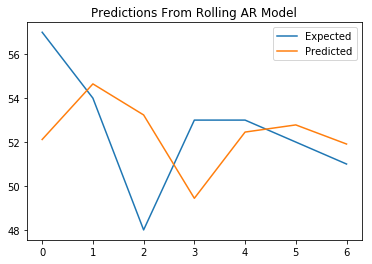

In [45]:
# plot
plt.plot(test)
plt.plot(predictions)
plt.title('Predictions From Rolling AR Model')
plt.legend(['Expected', 'Predicted'])
plt.show()